In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from keras.layers import Input, Conv2D, Conv2DTranspose,MaxPooling2D, ZeroPadding2D, \
                        GlobalAveragePooling2D, Flatten, Dense, Reshape, BatchNormalization, \
                        Activation, concatenate, add
from keras.preprocessing import image
from keras.models import Model
import keras.backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Input Image

(360, 480, 3)


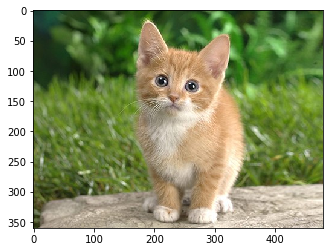

In [2]:
img = image.load_img("image/cat.jpg")
plt.imshow(img);

X = np.array(img, dtype="uint8")
print X.shape

## Conv2D

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 358, 478, 1)       28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 358, 478, 1)
Range: -339.669 75.9748


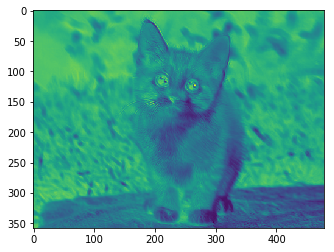

In [3]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = Conv2D(filters=1, kernel_size=(3, 3), padding="valid", dilation_rate=(1, 1))(input_tensor)
model = Model(input_tensor, output)

# store the weights
filter_weights = model.layers[1].get_weights()

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(y[0,:,:,0]);

## Dilated Convolution

<img src="image/dilated_conv.png" alt="Dilated convolution operation" style="width: 800px;" />

* Figure (a) is a 1-dilated 3x3 convolution filter. In other words, it's a standard 3x3 convolution filter.
* Figure (b) is a 2-dilated 3x3 convolution filter. The red dots are where the weights are and everywhere else is 0. In other words, it's a 5x5 convolution filter with 9 non-zero weights and everywhere else 0, as mentioned in the question. The receptive field in this case is 7x7 because each unit in the previous output has a receptive field of 3x3. The highlighted portions in blue show the receptive field and NOT the convolution filter (you could see it as a convolution filter if you wanted to but it's not helpful).
* Figure (c) is a 4-dilated 3x3 convolution filter. It's a 9x9 convolution filter with 9 non-zeros weights and everywhere else 0. From (b), we have it that each unit now has a 7x7 receptive field, and hence you can see a 7x7 blue portion around each red dot.

To draw an explicit contrast, consider this:

* If we use 3 successive layers of 3x3 convolution filters with stride of 1, the effective receptive field will only be 7x7 at the end of it. However, with the same computation and memory costs, we can achieve 15x15 with dilated convolutions. Both operations preserve resolution.
* If we use 3 successive layers of 3x3 convolution filters with increasing stride at an exponential rate at exactly the same rate as dilated convolutions in the paper, we will get a 15x15 receptive field at the end of it but with loss of coverage eventually as the stride gets larger. What this loss of coverage means is that the effective receptive field at some point will not be what we see above. Some parts will not be overlapping.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 352, 472, 1)       28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 352, 472, 1)
Range: -373.507 43.5499


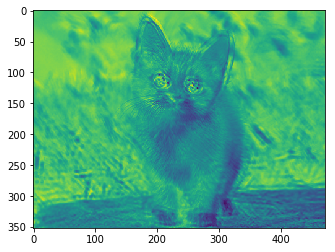

In [4]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = Conv2D(filters=1, kernel_size=(3, 3), padding="valid", dilation_rate=(4, 4))(input_tensor)
model = Model(input_tensor, output)

# set weights
model.layers[1].set_weights(filter_weights)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(y[0,:,:,0]);

## Conv2DTranspose

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 362, 482, 1)       28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 362, 482, 1)
Range: -527.438 31.5762


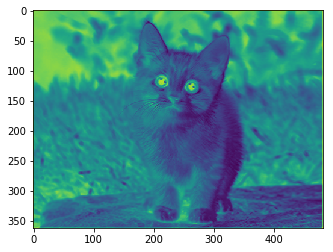

In [5]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = Conv2DTranspose(filters=1, kernel_size=(3, 3), padding="valid", dilation_rate=(3, 3))(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(y[0,:,:,0]);

## MaxPooling2D

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 96, 3)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 72, 96, 3)
Range: 6.0 255.0


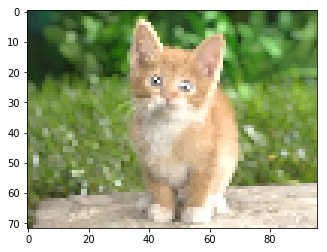

In [6]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = MaxPooling2D(pool_size=(5, 5), strides=(5, 5))(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(255*y[0]);

## Batch Normalization

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 360, 480, 3)       12        
Total params: 12
Trainable params: 6
Non-trainable params: 6
_________________________________________________________________
Shape: (1, 360, 480, 3)
Range: 0.0 254.873


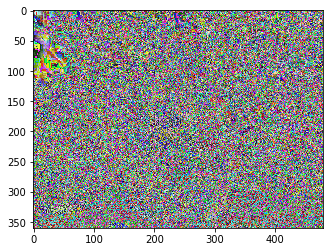

In [7]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = BatchNormalization()(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(255*y[0]);

## ZeroPadding2D

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 380, 500, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 380, 500, 3)
Range: 0.0 255.0


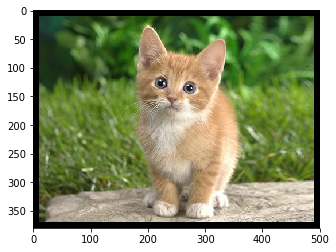

In [8]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = ZeroPadding2D(padding=(10, 10))(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(255*y[0]);

## GlobalAveragePooling2D

In [9]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = GlobalAveragePooling2D()(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
print "Output:", y

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 3)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 3)
Range: 85.6401 135.984
Output: [[ 125.74039459  135.98439026   85.64012909]]


## Flatten

In [10]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = Flatten()(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 518400)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 518400)
Range: 0.0 255.0


## Concatenate

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 360, 480, 3)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 720, 480, 3)  0           input_9[0][0]                    
                                                                 input_9[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
Shape: (1, 720, 480, 3)
Range: 0.0 255.0


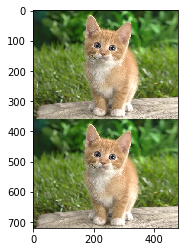

In [11]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = concatenate([input_tensor, input_tensor], axis=1)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(255*y[0]);

## Add

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 360, 480, 3)  0                                            
__________________________________________________________________________________________________
add_1 (Add)                     (None, 360, 480, 3)  0           input_10[0][0]                   
                                                                 input_10[0][0]                   
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
Shape: (1, 360, 480, 3)
Range: 0.0 510.0


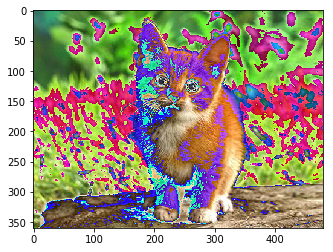

In [12]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = add([input_tensor, input_tensor])
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(255*y[0]);